In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use("seaborn")
pd.set_option("display.max_columns", None)

train_df = pd.read_csv("../input/tabular-playground-series-dec-2021/train.csv")
test_df = pd.read_csv("../input/tabular-playground-series-dec-2021/test.csv")
sub_df = pd.read_csv("../input/tabular-playground-series-dec-2021/sample_submission.csv")


/tmp/ipykernel_8/3832906544.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

idx = train_df[train_df["Cover_Type"] == 5].index
train_df.drop(idx, axis=0, inplace=True)


In [4]:
cols = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]


<Axes: >

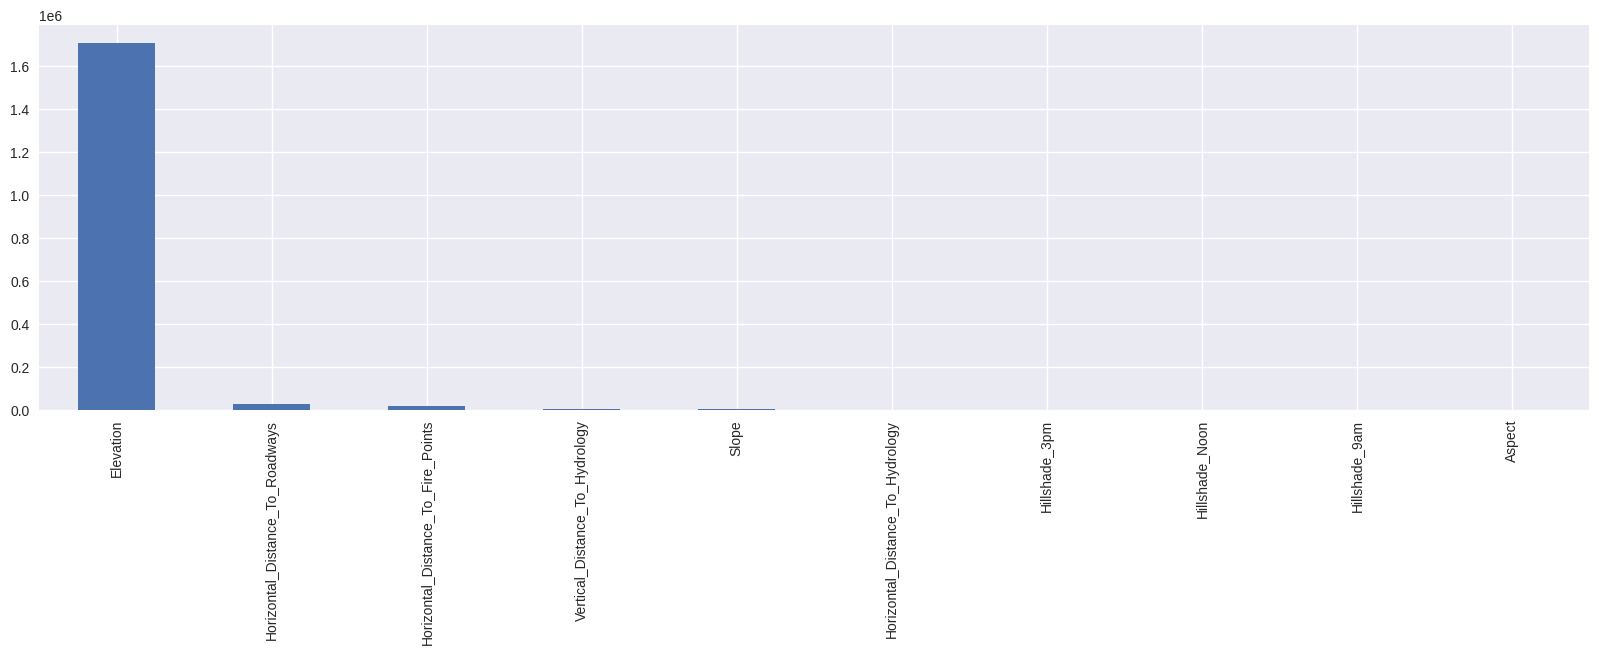

In [5]:
from sklearn.feature_selection import f_classif, SelectKBest


selector = SelectKBest(f_classif, k="all")
selector.fit(
    train_df[cols],
    train_df["Cover_Type"]
)

pd.Series(selector.scores_, index=cols).nlargest(len(cols)).plot(kind="bar", figsize=(20, 5))


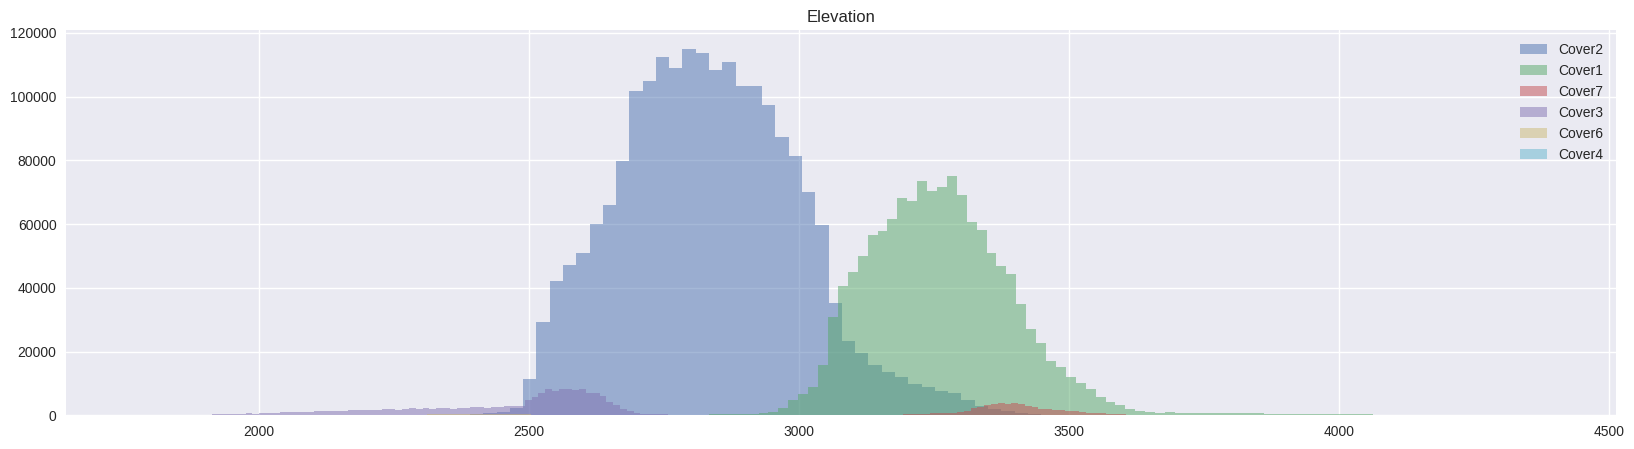

In [6]:
# This code is borrowed from -> https://www.kaggle.com/thalesgaluchi/histograms-for-a-good-prediction
fig, ax = plt.subplots(figsize=(20, 5))
for item in train_df["Cover_Type"].unique():
    ax.hist(train_df[train_df.Cover_Type.isin([item])]["Elevation"], alpha=0.5, label='Cover'+str(item), bins= 100)
    ax.set_title("Elevation")

ax.legend()


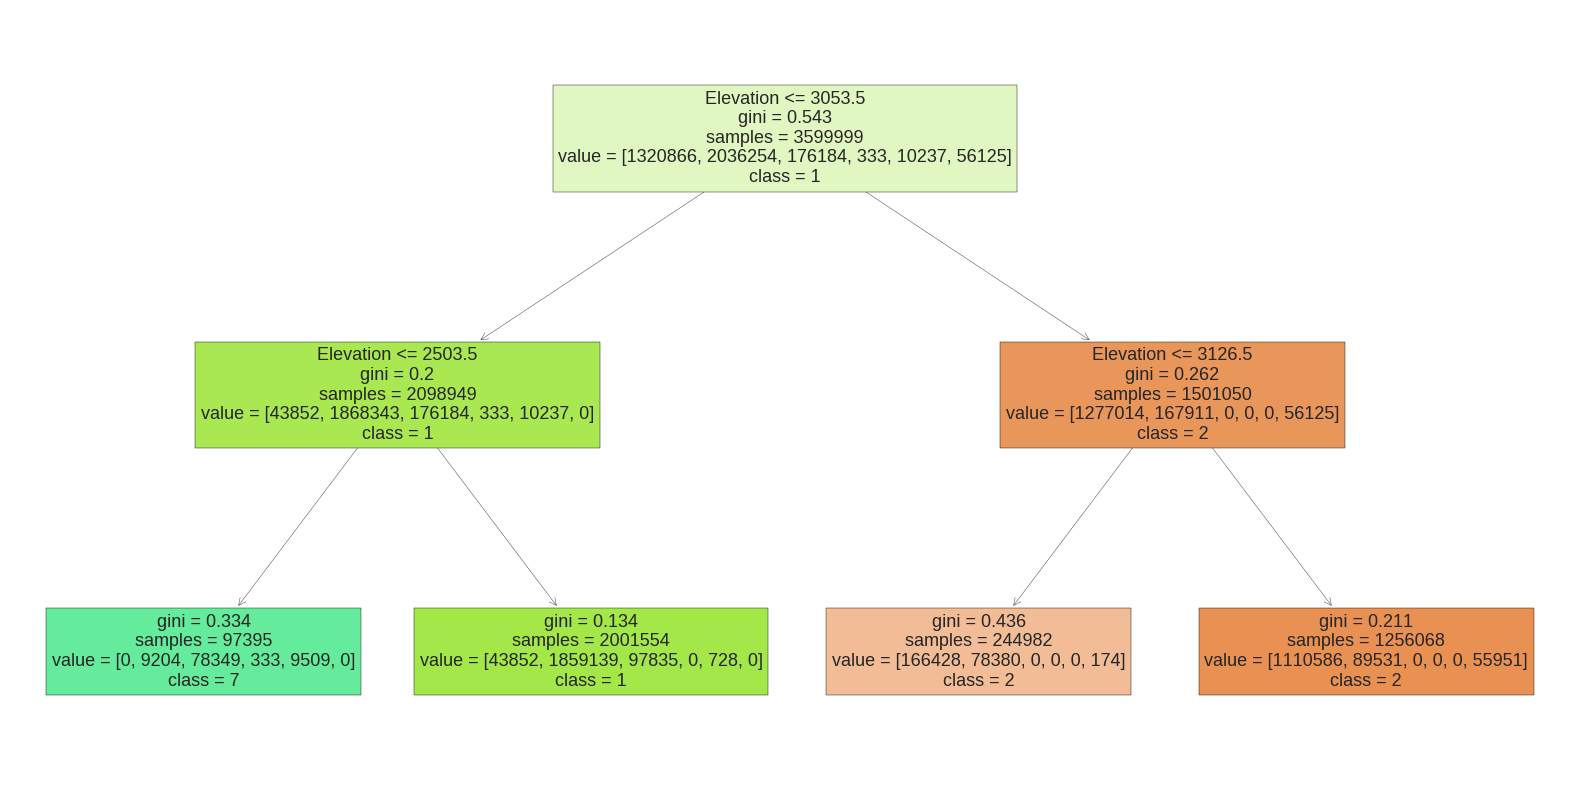

In [7]:
# Modelling using only elevation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split


clf = DecisionTreeClassifier(max_depth=2)
clf.fit(
    train_df[["Elevation"]],
    train_df["Cover_Type"]
)

_, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    clf,
    feature_names=["Elevation"],
    class_names=train_df["Cover_Type"].unique().astype(str),
    filled=True,
    ax=ax,
    fontsize=13
)

plt.show()


In [8]:
def predict(x):
    if x  2503:
        return 3
    elif x  3053:
        return 2
    else:
        return 1

sub_df["Cover_Type"] = test_df["Elevation"].apply(predict)
sub_df.to_csv("submission.csv", index=False)

sub_df["Cover_Type"].value_counts()


SyntaxError: invalid syntax (755873298.py, line 2)